In [2]:
#install and download needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor,BaggingRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import mean_squared_error,accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv('SHOP.csv')

In [4]:
data.shape 

(2205, 7)

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-21,2.800,2.874,2.411,2.568,2.568,123039000
1,2015-05-22,2.607,3.110,2.600,2.831,2.831,28412000
2,2015-05-26,2.980,3.034,2.908,2.965,2.965,8202000
3,2015-05-27,3.067,3.081,2.700,2.750,2.750,7976000
4,2015-05-28,2.755,2.774,2.648,2.745,2.745,4000000


In [6]:
data.index 

RangeIndex(start=0, stop=2205, step=1)

In [7]:
data=data.rename(columns={'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'})

In [8]:
data=data.drop(columns=['Adj Close'],axis=1)

In [9]:
data['date']=pd.to_datetime(data['date'])

In [10]:
data.set_index('date', inplace=True)

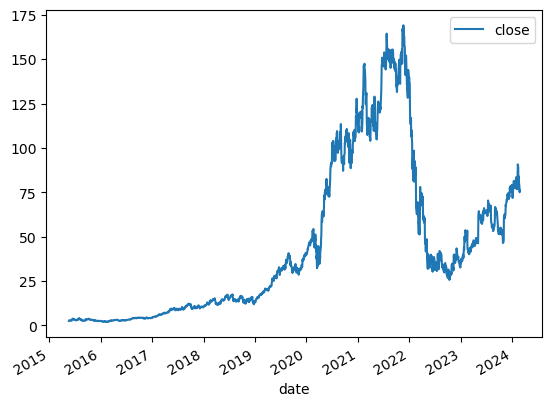

In [11]:
data.plot.line(y='close', use_index=True)
plt.savefig('SHOP.png');

In [12]:
data.describe()

,open,high,low,close,volume
count,2205.000000,2205.000000,2205.000000,2205.000000,2.205000e+03
mean,44.239836,45.241647,43.177375,44.237233,1.752831e+07
std,43.782913,44.653352,42.759488,43.718756,1.473768e+07
min,1.939000,1.985000,1.848000,1.933000,1.039000e+06
25%,9.444000,9.585000,9.277000,9.424000,8.926000e+06
50%,31.482000,32.424000,30.846001,31.500000,1.377940e+07
75%,66.260002,67.360001,64.510002,65.940002,2.187100e+07
max,171.800003,176.291794,168.509506,169.059998,2.089590e+08


In [82]:
data['Tomorrow']=data['close'].shift(-1)

In [83]:
data['previousday']=data['close'].shift(1)

In [84]:
data.head() 

,open,high,low,close,volume,Tomorrow,previousday
date,,,,,,,
2015-05-21,2.800,2.874,2.411,2.568,123039000,2.831,NaN
2015-05-22,2.607,3.110,2.600,2.831,28412000,2.965,2.568
2015-05-26,2.980,3.034,2.908,2.965,8202000,2.750,2.831
2015-05-27,3.067,3.081,2.700,2.750,7976000,2.745,2.965
2015-05-28,2.755,2.774,2.648,2.745,4000000,2.720,2.750


In [85]:
train = data.iloc[:-200]
test = data.iloc[-200:]

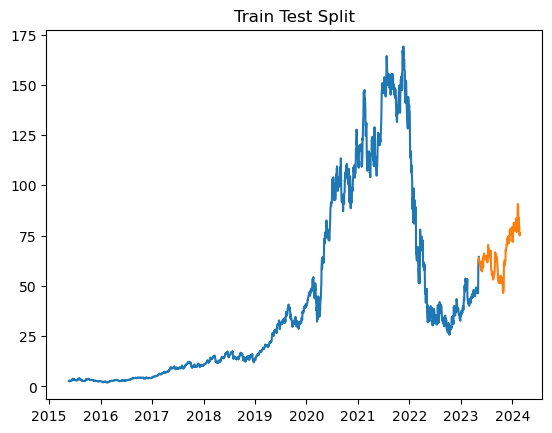

In [86]:
import matplotlib.pyplot as plt 
plt.plot(train['close'], label='train')
plt.plot(test['close'], label='test')
plt.title('Train Test Split');

In [87]:
# Utility function
def evaluate_model(model, x, y):
    """
    Utility function to print the model performance, (MAE and MAPE)
    model: Fitted model
    x:  features dataset
    y:  target values
    """
    predicted = model.predict(x) #get predictions
    mae = mean_absolute_error(y_true=y, y_pred=predicted)
    abs_errors= np.abs(np.array(predicted) - np.array(y))
    min_abs_errors= np.min(abs_errors)
    max_abs_errors= np.max(abs_errors)
    med_abs_errors= np.median(abs_errors)
    mape = mean_absolute_percentage_error(y, predicted)

    print('MAE: {:.2f}'.format(mae))
    print('MAPE: {:.2f}'.format(mape))
    print('minae: {:.2f}'.format(min_abs_errors))
    print('maxae: {:.2f}'.format(max_abs_errors))
    print('medae: {:.2f}'.format(med_abs_errors))
    print()

In [88]:
#predictors_1 = ["close", "volume", "open", "high", "low"]
predictors_2 = ["volume", "open", "high", "low"]

In [89]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on  test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors_2], train['close'])
    print(f'Performance of "{key}" on Validation and Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors_2], test['close'])





Performance of "RF Regressor" on Validation and Test set:
Test set:
****************
MAE: 0.86
MAPE: 0.01
minae: 0.02
maxae: 3.06
medae: 0.69

Performance of "xgboost" on Validation and Test set:
Test set:
****************
MAE: 1.05
MAPE: 0.02
minae: 0.01
maxae: 4.19
medae: 0.80

Performance of "Gradient Boost" on Validation and Test set:
Test set:
****************
MAE: 1.02
MAPE: 0.02
minae: 0.00
maxae: 3.72
medae: 0.79

Learning rate set to 0.297108
0:	learn: 32.6141426	total: 2.98ms	remaining: 295ms
1:	learn: 23.5613723	total: 5.79ms	remaining: 284ms
2:	learn: 17.3236659	total: 8.29ms	remaining: 268ms
3:	learn: 12.8403542	total: 10.7ms	remaining: 257ms
4:	learn: 9.5321881	total: 13.1ms	remaining: 250ms
5:	learn: 7.2783082	total: 15.6ms	remaining: 244ms
6:	learn: 5.6038945	total: 18.2ms	remaining: 242ms
7:	learn: 4.5166305	total: 21ms	remaining: 242ms
8:	learn: 3.8346176	total: 23.9ms	remaining: 242ms
9:	learn: 3.4290222	total: 26.6ms	remaining: 239ms
10:	learn: 3.1072599	total: 29.2

#### Retrain the best Model(Extreme Gradient Boosting)

In [90]:
model= GradientBoostingRegressor()
model.fit(train[predictors_2], train['close'])
pred= model.predict(test[predictors_2])

In [91]:

pred= pd.Series(pred, index=test.index)
combined_2= pd.concat([test['close'], pred],axis=1)

In [92]:
#combined_1.plot();
combined_2

,close,0
date,,
2023-05-09,63.889999,63.034013
2023-05-10,63.169998,63.034013
2023-05-11,62.900002,63.103188
2023-05-12,61.330002,63.103188
2023-05-15,61.580002,63.103188
...,...,...
2024-02-16,81.290001,81.446699
2024-02-20,78.620003,81.146903
2024-02-21,75.589996,78.072123


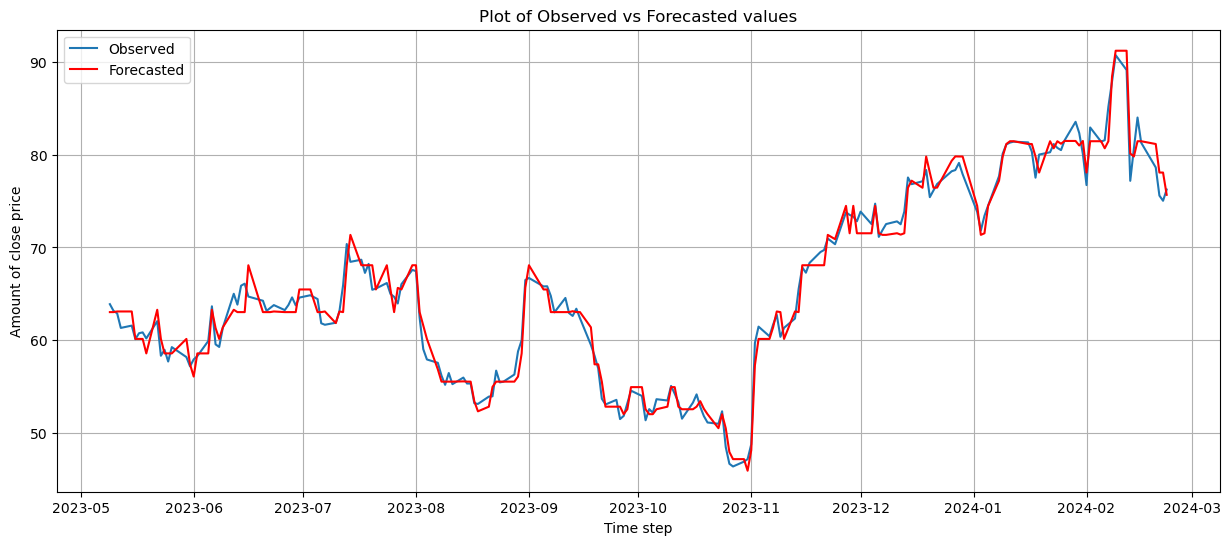

In [93]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_2['close'], label='Observed')
plt.plot(combined_2[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [94]:
#add additional predictors to the model
#calculate the mean close price in certain days and  find the ratio between today's closing price and that of the periods
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["close"] / rolling_averages["close"]
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["close"]
    
    
    
    new_predictors+= [ratio_column, trend_column]

In [95]:
data['mom'] = data['close'].pct_change(12) # 12 month change

In [96]:
#Create the RSI indicator
#data['rsi' + str(n)] = talib.RSI(data['close'].values, timeperiod=horizon)
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [97]:
data['RSI']= computeRSI(data['close'], 14)

In [98]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,mom,RSI
date,,,,,,,,,,,,,,,,,,,
2015-05-21,2.800,2.874,2.411,2.568,123039000,2.831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-22,2.607,3.110,2.600,2.831,28412000,2.965,2.568,1.048713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-26,2.980,3.034,2.908,2.965,8202000,2.750,2.831,1.023119,5.399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-27,3.067,3.081,2.700,2.750,7976000,2.745,2.965,0.962380,5.796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-28,2.755,2.774,2.648,2.745,4000000,2.720,2.750,0.999090,5.715,0.990331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
data.shape 

(2205, 19)

In [100]:
new_data=data[new_predictors]
new_data['close']=data['close']
new_data['MOM']=data['mom']
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM
date,,,,,,,,,,,,
2015-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.568,NaN
2015-05-22,1.048713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.831,NaN
2015-05-26,1.023119,5.399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.965,NaN
2015-05-27,0.962380,5.796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.750,NaN
2015-05-28,0.999090,5.715,0.990331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.745,NaN


In [101]:
new_data['SMA_3'] = new_data.iloc[:,10].rolling(window=3).mean()
new_data['SMA_4'] = new_data.iloc[:,10].rolling(window=4).mean()

In [102]:
new_data['CMA_4'] = new_data['close'].expanding(min_periods=4).mean()

In [103]:
new_data['EMA'] = new_data.iloc[:,10].ewm(span=40,adjust=False).mean()

In [104]:
new_data=new_data.dropna()
new_data.shape 

(1205, 16)

In [105]:
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM,SMA_3,SMA_4,CMA_4,EMA
date,,,,,,,,,,,,,,,,
2019-05-13,0.984224,51.944999,0.971723,130.516997,1.190150,1256.901005,1.523855,4103.586002,2.851615,8772.155002,25.079000,0.145317,25.674666,25.79375,8.788446,22.558784
2019-05-14,1.004683,50.961999,0.985096,129.043997,1.194269,1264.328005,1.534069,4114.401002,2.871109,8794.666002,25.315001,0.138879,25.425667,25.58475,8.804939,22.693234
2019-05-15,1.021283,50.394001,1.025824,128.489999,1.238144,1271.824006,1.596074,4125.466003,2.988032,8817.150003,26.416000,0.169937,25.603334,25.67325,8.822498,22.874832
2019-05-16,1.025546,51.731001,1.065221,128.755000,1.293080,1280.110007,1.674418,4137.654003,3.135810,8840.601003,27.801001,0.141584,26.510667,26.15275,8.841400,23.115133
2019-05-17,0.991822,54.217001,1.036291,130.494001,1.262800,1289.990008,1.642252,4150.845004,3.076402,8865.652004,27.350000,0.115598,27.189000,26.72050,8.859817,23.321712


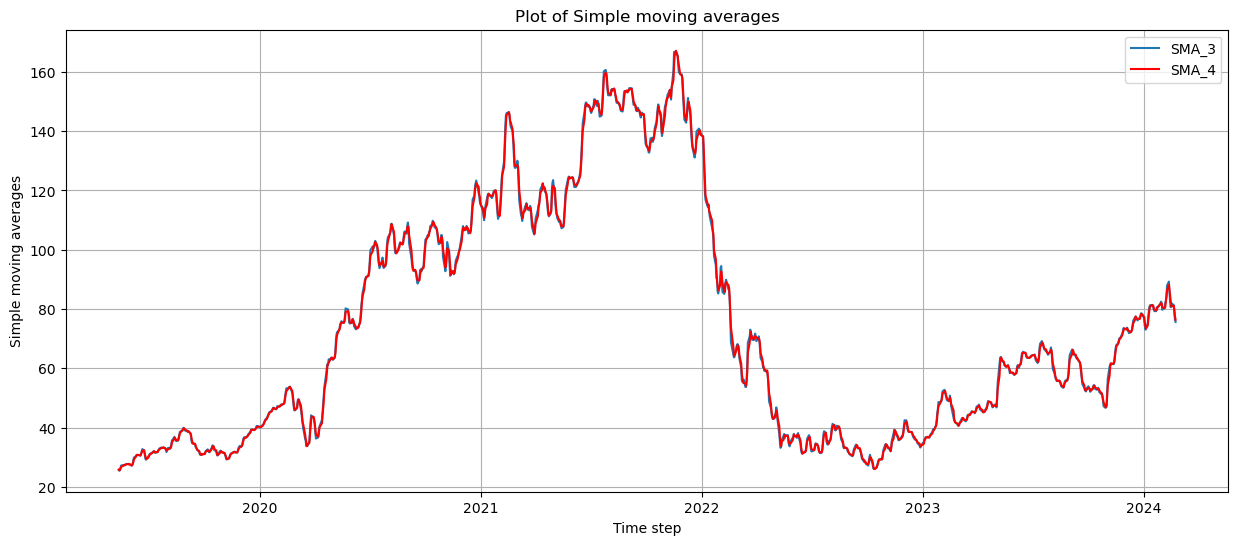

In [106]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['SMA_3'], label='SMA_3')
plt.plot(new_data['SMA_4'], color='r', label='SMA_4')
plt.title('Plot of Simple moving averages')
plt.ylabel('Simple moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

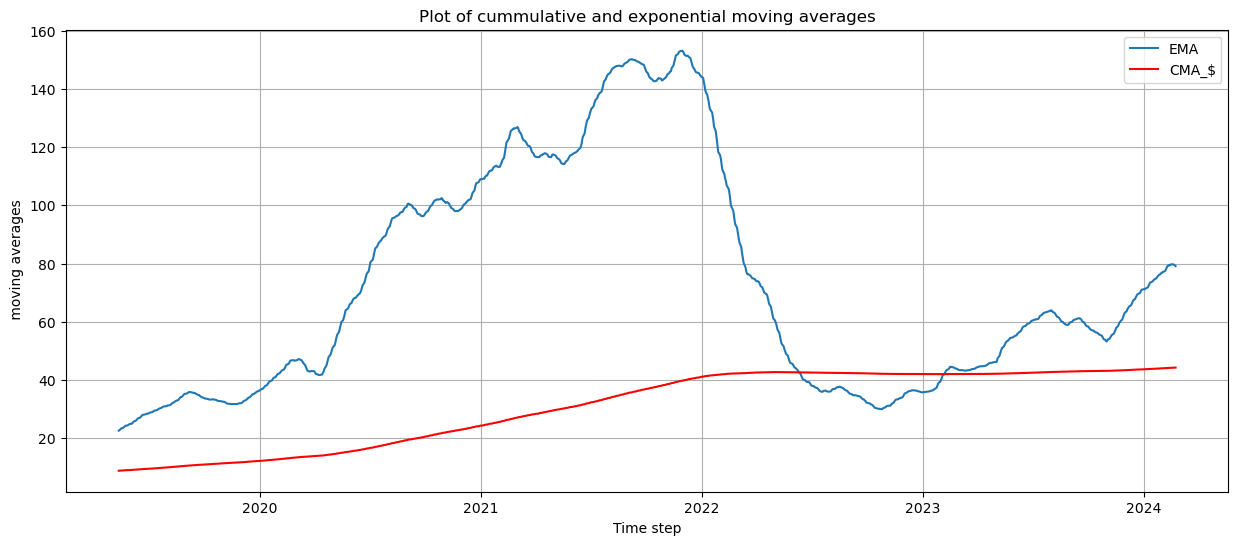

In [107]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['EMA'], label='EMA')
plt.plot(new_data['CMA_4'], color='r', label='CMA_$')
plt.title('Plot of cummulative and exponential moving averages')
plt.ylabel(' moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

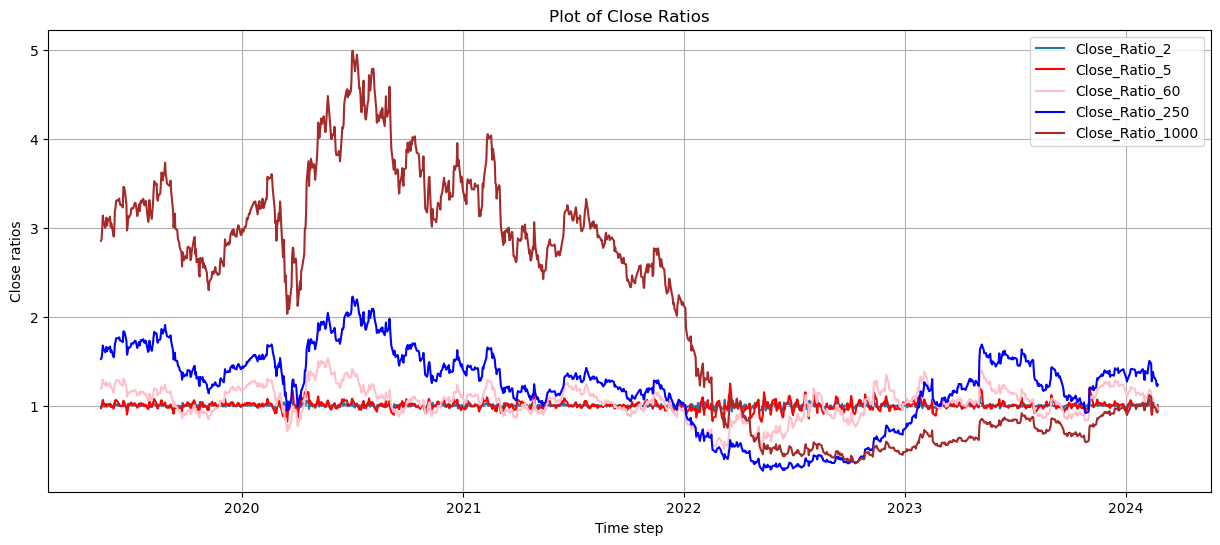

In [108]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Close_Ratio_2'], label='Close_Ratio_2')
plt.plot(new_data['Close_Ratio_5'], color='r', label='Close_Ratio_5')
plt.plot(new_data['Close_Ratio_60'], color='pink', label='Close_Ratio_60')
plt.plot(new_data['Close_Ratio_250'], color='b', label='Close_Ratio_250')
plt.plot(new_data['Close_Ratio_1000'], color='brown', label='Close_Ratio_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

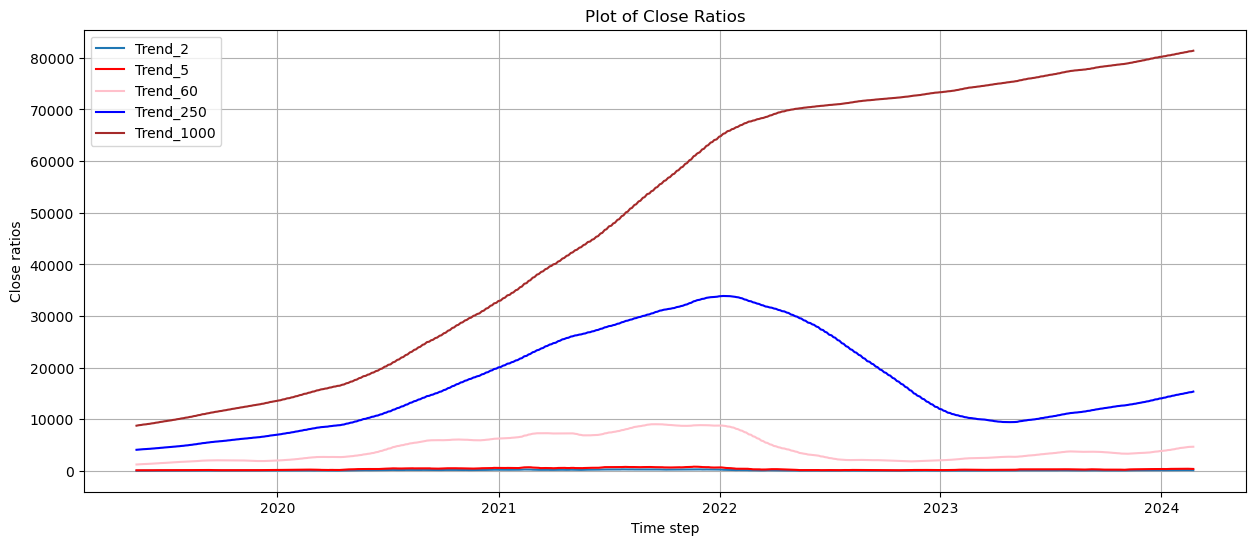

In [109]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Trend_2'], label='Trend_2')
plt.plot(new_data['Trend_5'], color='r', label='Trend_5')
plt.plot(new_data['Trend_60'], color='pink', label='Trend_60')
plt.plot(new_data['Trend_250'], color='b', label='Trend_250')
plt.plot(new_data['Trend_1000'], color='brown', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [110]:
new_data['RSI']=data['RSI']
new_data['previousday']=data['previousday']

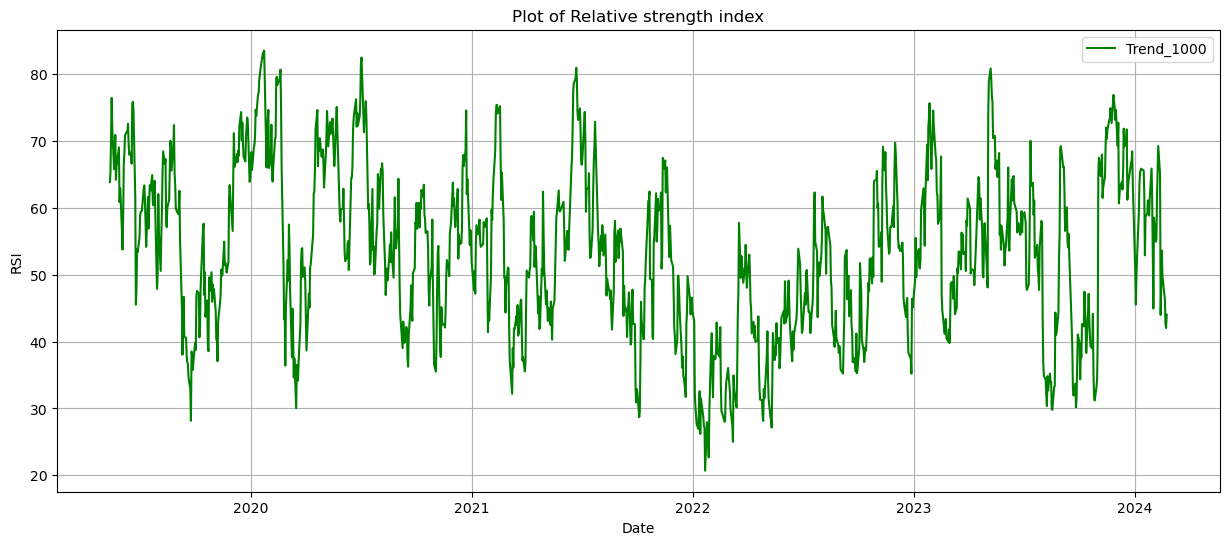

In [111]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['RSI'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Relative strength index')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

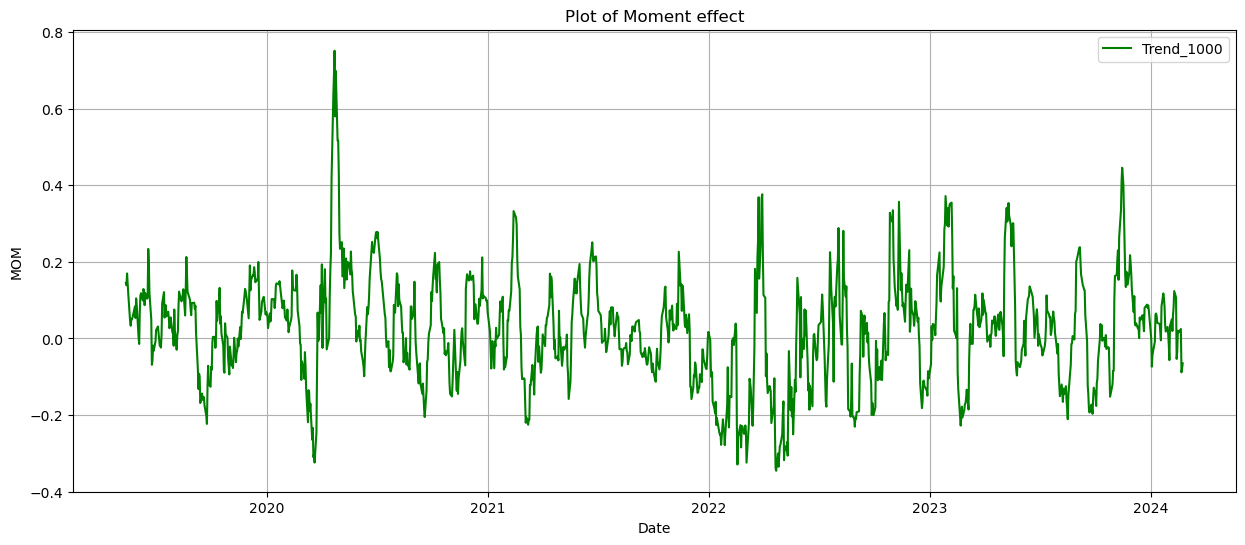

In [112]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['MOM'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Moment effect')
plt.ylabel('MOM')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [113]:
train = new_data.iloc[:-200]
test = new_data.iloc[-200:]

In [114]:
train.shape

(1005, 18)

In [115]:
new_data.columns

Index(['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'close', 'MOM', 'SMA_3', 'SMA_4',
       'CMA_4', 'EMA', 'RSI', 'previousday'],
      dtype='object')

In [116]:
predictors= ['SMA_3','SMA_4','EMA','RSI','MOM', 'previousday'] 

#### Retrain the models on the new predictors

In [117]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on Cross validation and test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors], train['close'])
    print(f'Performance of "{key}" on  Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors], test['close'])

Performance of "RF Regressor" on  Test set:
Test set:
****************
MAE: 1.73
MAPE: 0.03
minae: 0.02
maxae: 12.99
medae: 1.28

Performance of "xgboost" on  Test set:
Test set:
****************
MAE: 1.72
MAPE: 0.03
minae: 0.01
maxae: 8.02
medae: 1.39

Performance of "Gradient Boost" on  Test set:
Test set:
****************
MAE: 1.39
MAPE: 0.02
minae: 0.00
maxae: 8.50
medae: 1.16

Learning rate set to 0.266392
0:	learn: 32.3251550	total: 3.8ms	remaining: 377ms
1:	learn: 24.5416781	total: 6.49ms	remaining: 318ms
2:	learn: 18.7676878	total: 9.09ms	remaining: 294ms
3:	learn: 14.2818407	total: 11.9ms	remaining: 286ms
4:	learn: 10.9964280	total: 14.9ms	remaining: 283ms
5:	learn: 8.6259995	total: 17.9ms	remaining: 280ms
6:	learn: 6.8652226	total: 20.6ms	remaining: 273ms
7:	learn: 5.6751528	total: 23.3ms	remaining: 268ms
8:	learn: 4.8357046	total: 26.4ms	remaining: 267ms
9:	learn: 4.2336582	total: 29.6ms	remaining: 267ms
10:	learn: 3.8110230	total: 32.5ms	remaining: 263ms
11:	learn: 3.513526

#### Improving the model

In [118]:
#model_1 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
#n_estimators=200, min_samples_split=50, random_state=1
model_2= GradientBoostingRegressor(random_state=0)

def predict(train, test, predictors_1, model_1):
    model_1.fit(train[predictors_1], train["Target"])
    preds_1 = model_1.predict_proba(test[predictors_1])[:,1]
    preds_1[preds_1 >=.6] = 1
    preds_1[preds_1 <.6] = 0
    preds_1 = pd.Series(preds_1, index=test.index, name="Predictions_1")
    combined_1 = pd.concat([test["Target"], preds_1], axis=1)
    return combined_1 

In [119]:
def predict(train, test, predictors, model_2):
    model_2.fit(train[predictors], train["close"])
    preds_2 = model_2.predict(test[predictors])
    preds_2 = pd.Series(preds_2, index=test.index, name="Predictions_2")
    combined_2 = pd.concat([test["close"], preds_2], axis=1)
    return combined_2

In [120]:
def backtest(new_data, model_2, predictors, start=500, step=250):
    all_predictions = []

    for i in range(start, new_data.shape[0], step):
        train = new_data.iloc[0:i].copy()
        test = new_data.iloc[i:(i+step)].copy()
        predictions_2 = predict(train, test, predictors, model_2)
        all_predictions.append(predictions_2)
    
    return pd.concat(all_predictions)

In [121]:
predictions_2 = backtest(new_data, model_2, predictors)

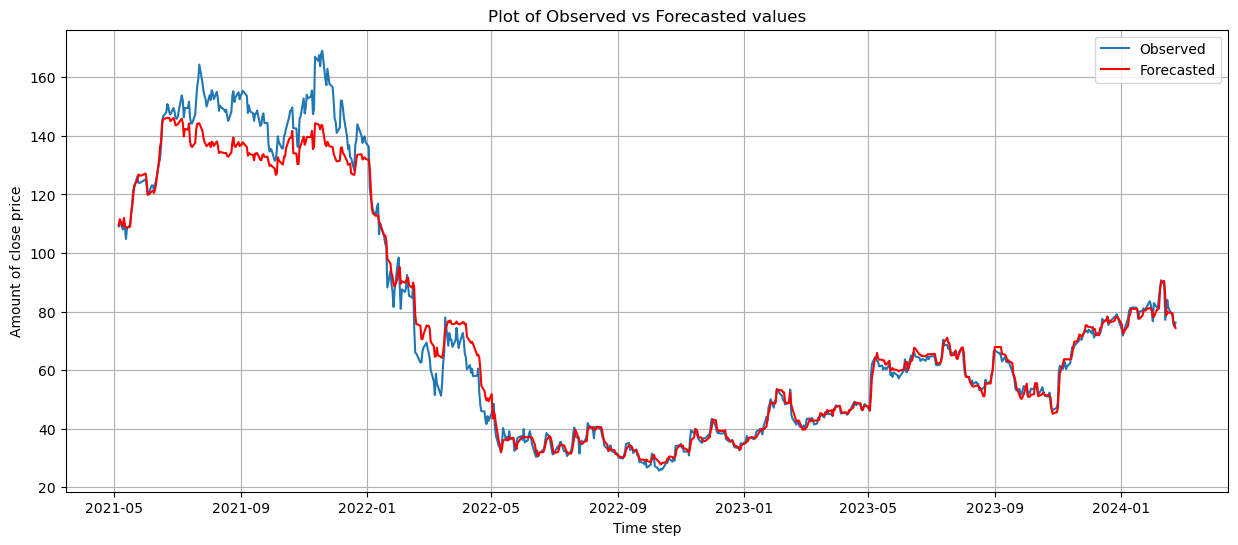

In [122]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(predictions_2['close'], label='Observed')
plt.plot(predictions_2['Predictions_2'], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [123]:
model_2.fit(train[predictors], train['close'])
prediction=model_2.predict(test[predictors])

In [124]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [125]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.021813756014395835

mean absolute  error is : 1.3909243479988083



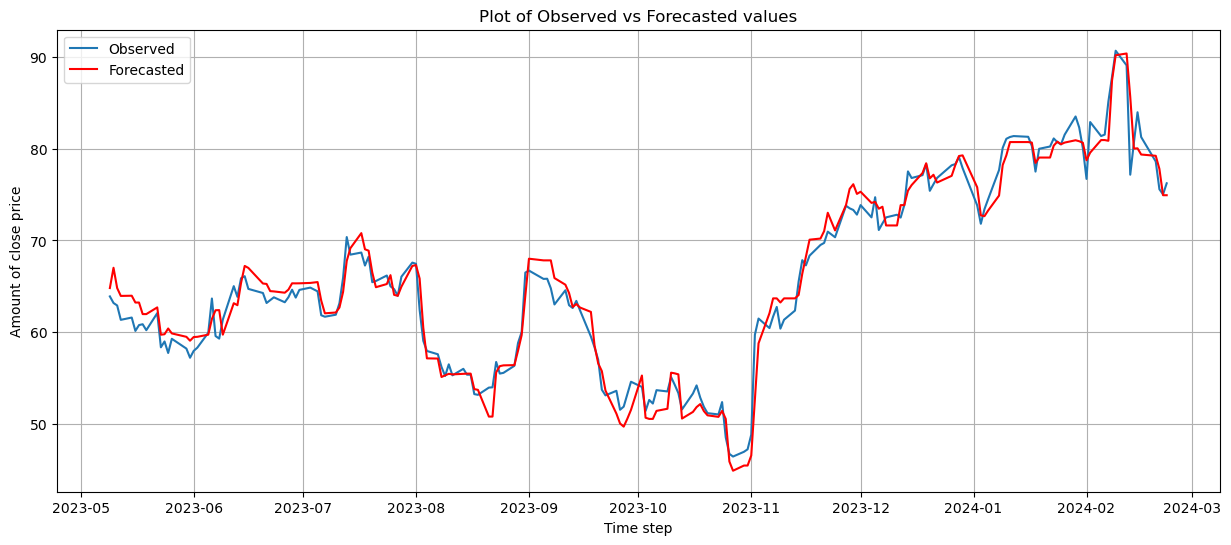

In [126]:
# Plot the test predictions and true values
pred= pd.Series(prediction, index=test.index)
plt.figure(figsize=(15,6))
plt.plot(test['close'], label='Observed')
plt.plot(pred, color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

#### Perform Hyper parameter tuning using grid searchcv

#possibe hyperparameters for random forest
hyper = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 6]
}

from sklearn.model_selection import GridSearchCV

cv_model= GridSearchCV(GradientBoostingRegressor(), param_grid=hyper)
cv_model.fit(train[predictors], train['close'])

print(cv_model.best_score_)
print(cv_model.best_estimator_)

In [127]:
model = GradientBoostingRegressor(max_depth=7, n_estimators=350,  min_samples_split=5)
model.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [128]:
grdb_mae =  mean_absolute_error(test['close'], prediction)
abs_errors= np.abs(np.array(prediction) - np.array(test['close']))
grdb_min_abs_errors= np.min(abs_errors)
grdb_max_abs_errors= np.max(abs_errors)
grdb_med_abs_errors= np.median(abs_errors)
grdb_mape = mean_absolute_percentage_error(test['close'], prediction)

In [129]:
print(f"Optimized Gradient boosting Performance Metrics \n\n \
gradientboost Mae: {grdb_mae} \n \
gradientboost minae: {grdb_min_abs_errors} \n \
gradientboost maxae: {grdb_max_abs_errors} \n \
gradientboost medae: {grdb_med_abs_errors} \n \
gradientboost Mape: {grdb_mape} \n \
 \n\n <-------------------------------------------------->\n")

Optimized Gradient boosting Performance Metrics 

 gradientboost Mae: 2.5283566358850855 
 gradientboost minae: 0.012371073531475929 
 gradientboost maxae: 13.997422802435167 
 gradientboost medae: 2.1269825300288083 
 gradientboost Mape: 0.037819210300109124 
  

 <-------------------------------------------------->



In [130]:
pred= pd.Series(prediction, index=test.index)
combined= pd.concat([test['close'], pred],axis=1)
combined 

,close,0
date,,
2023-05-09,63.889999,63.545672
2023-05-10,63.169998,65.958132
2023-05-11,62.900002,64.043933
2023-05-12,61.330002,62.816472
2023-05-15,61.580002,63.889360
...,...,...
2024-02-16,81.290001,73.079413
2024-02-20,78.620003,71.885952
2024-02-21,75.589996,70.232466


In [131]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [132]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.037819210300109124

mean absolute  error is : 2.5283566358850855



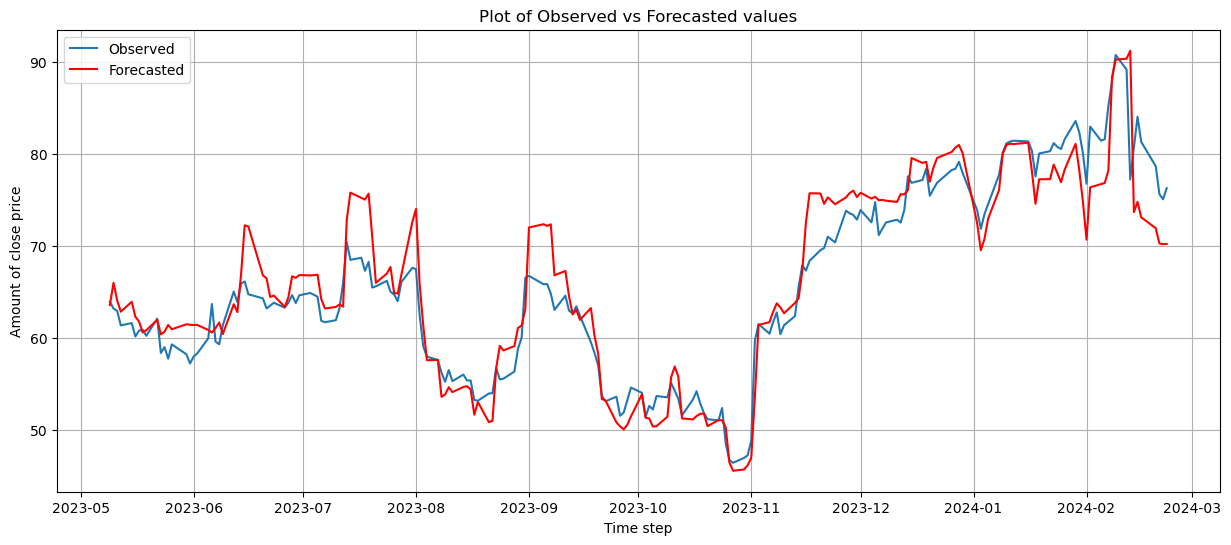

In [133]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined['close'], label='Observed')
plt.plot(combined[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

### Stacking and Bagging

In [134]:
# List of machine learning algorithms to consider
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet 
algorithms = [
    ('Linear regression', LinearRegression(), {}),
    ('Ridge', Ridge(), {}),
    ('Lasso', Lasso(), {}),
    ('Elastic Net', ElasticNet(), {}),
    #('SVM', SVC(kernel='linear', probability=True, decision_function_shape='ovr'), {}),
    ('MLP', MLPRegressor(), {})
]

# Train base models
base_models = {}
for algorithm_name, algorithm, _ in algorithms:
    print(algorithm)
    model = algorithm
    model.fit(train[predictors], train['close'])
    base_models[algorithm_name] = model

eval_metrics = ['mae', 'mape']
results = pd.DataFrame(columns=['Algorithm'] + eval_metrics)

for algorithm_name, model in base_models.items():
    y_pred = model.predict(test[predictors])
    mae= mean_absolute_error(test['close'], y_pred)
    mape =mean_absolute_percentage_error(test['close'], y_pred)

# Ensembling using Bagging with all base models
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=10, random_state=42)
bagging_model.fit(train[predictors], train['close'])
bagging_y_pred = bagging_model.predict(test[predictors])
bagging_mae = mean_absolute_error(test['close'], bagging_y_pred)
abs_errors= np.abs(np.array(bagging_y_pred) - np.array(test['close']))
bagg_min_abs_errors= np.min(abs_errors)
bagg_max_abs_errors= np.max(abs_errors)
bagg_med_abs_errors= np.median(abs_errors)
bagging_mape = mean_absolute_percentage_error(test['close'], bagging_y_pred)
print(f"Bagging Ensemble Method Performance Metrics \n\n \
bagging Mae: {bagging_mae} \n \
bagging minae: {bagg_min_abs_errors} \n \
bagging maxae: {bagg_max_abs_errors} \n \
bagging medae: {bagg_med_abs_errors} \n \
bagging Mape: {bagging_mape} \n \
 \n\n <-------------------------------------------------->\n")

# Ensembling using Stacking
meta_model = Ridge()
stacking_model = StackingRegressor(estimators=list(base_models.items()), final_estimator=meta_model)
stacking_model.fit(train[predictors], train['close'])
stacking_y_pred = stacking_model.predict(test[predictors])
stacking_mae =  mean_absolute_error(test['close'], stacking_y_pred)
abs_errors= np.abs(np.array(stacking_y_pred) - np.array(test['close']))
stack_min_abs_errors= np.min(abs_errors)
stack_max_abs_errors= np.max(abs_errors)
stack_med_abs_errors= np.median(abs_errors)
stacking_mape = mean_absolute_percentage_error(test['close'], stacking_y_pred)
print(f"Stacking Ensemble Method Performance Metrics \n\n \
stacking mae: {stacking_mae} \n \
stacking minae: {stack_min_abs_errors} \n \
stacking maxae: {stack_max_abs_errors} \n \
stacking medae: {stack_med_abs_errors} \n \
stacking mape: {stacking_mape} \n")




#print(f"Stacking F1 Score: {stacking_f1}")


LinearRegression()
Ridge()
Lasso()
ElasticNet()
MLPRegressor()
Bagging Ensemble Method Performance Metrics 

 bagging Mae: 2.042829514 
 bagging minae: 0.009599299999997868 
 bagging maxae: 13.170701199999982 
 bagging medae: 1.5624985999999943 
 bagging Mape: 0.03072439973190546 
  

 <-------------------------------------------------->

Stacking Ensemble Method Performance Metrics 

 stacking mae: 0.913915806479053 
 stacking minae: 0.012233124524357208 
 stacking maxae: 5.893732053648847 
 stacking medae: 0.7305861206262847 
 stacking mape: 0.013979822235290484 



In [135]:
bagging_y_pred= pd.Series(bagging_y_pred, index=test.index)
stacking_y_pred= pd.Series(stacking_y_pred, index=test.index)

In [136]:
combined_stack= pd.concat([test['close'], stacking_y_pred],axis=1)
combined_bagg= pd.concat([test['close'], bagging_y_pred], axis=1)

In [137]:
combined_bagg.head()

,close,0
date,,
2023-05-09,63.889999,63.814601
2023-05-10,63.169998,64.493600
2023-05-11,62.900002,63.372701
2023-05-12,61.330002,62.830200
2023-05-15,61.580002,64.328000


In [138]:
combined_stack.head()

,close,0
date,,
2023-05-09,63.889999,64.745727
2023-05-10,63.169998,64.427759
2023-05-11,62.900002,63.283493
2023-05-12,61.330002,61.910021
2023-05-15,61.580002,62.110651


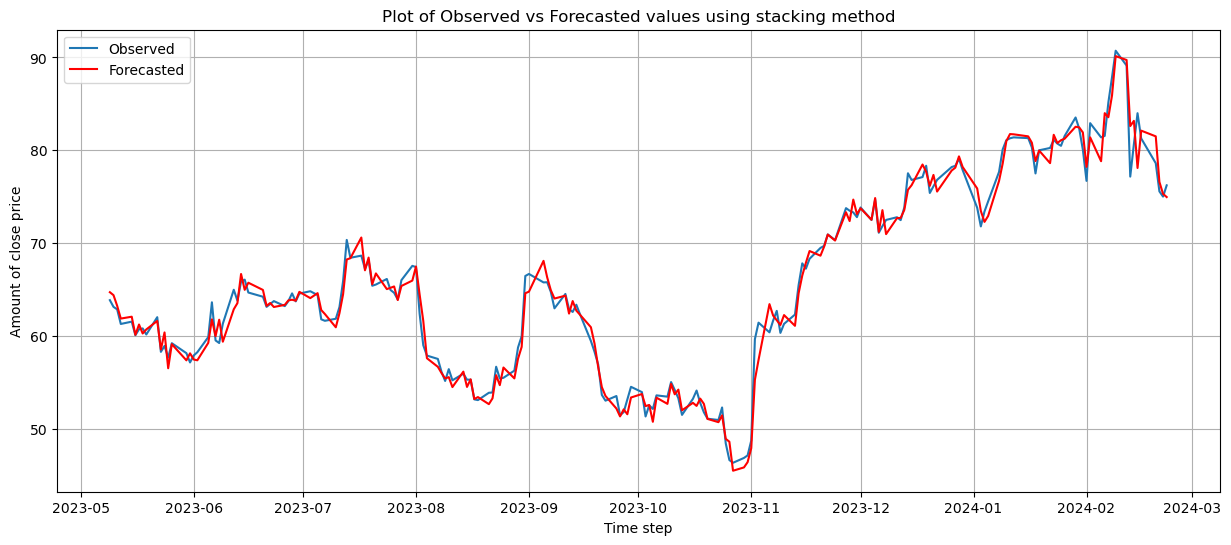

In [139]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_stack['close'], label='Observed')
plt.plot(combined_stack[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

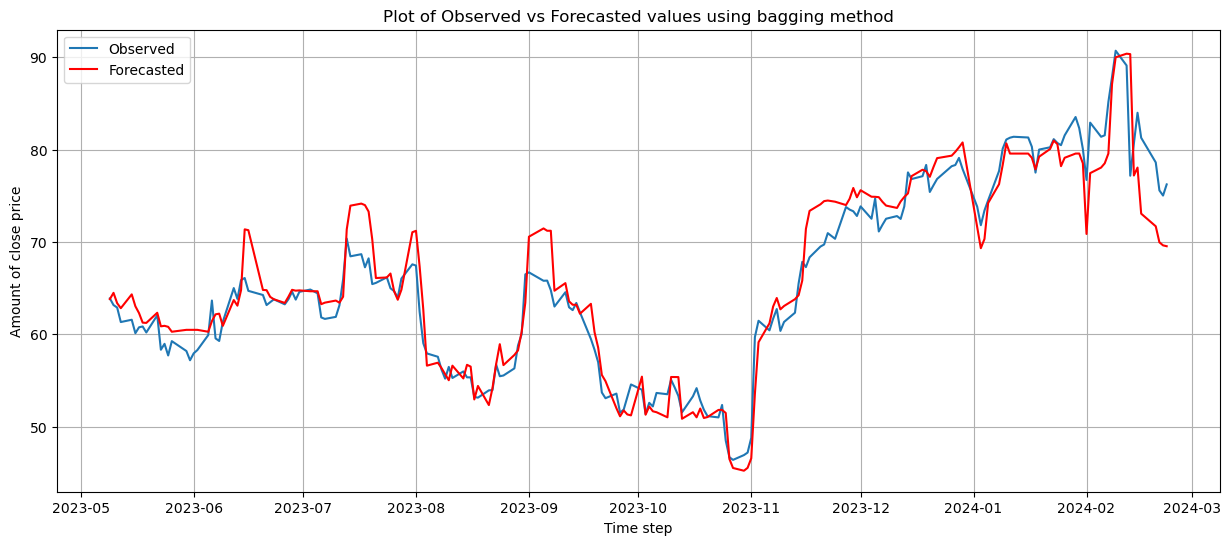

In [140]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

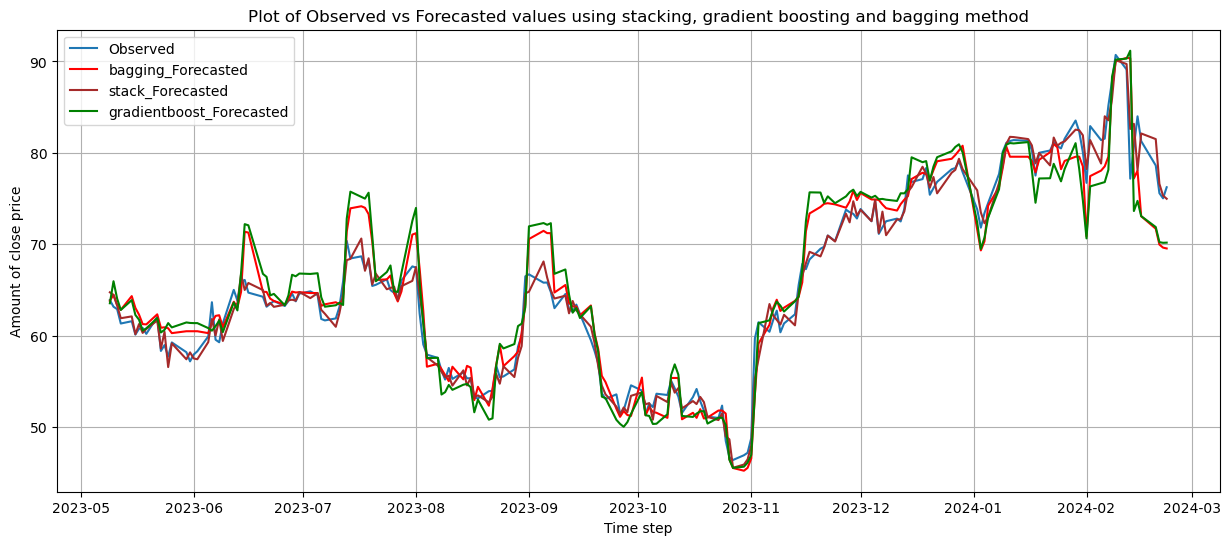

In [141]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='bagging_Forecasted')
plt.plot(combined_stack[0], color='brown', label='stack_Forecasted')
plt.plot(combined[0], color='green', label='gradientboost_Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking, gradient boosting and bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('shopifyresult.png')
plt.show()

In [142]:
from prettytable import PrettyTable
import joblib
import os
# Constructing the result summary table containing the scores for each model on  test dataset.

task1_result = PrettyTable()
task1_result.field_names = ["Regressor", "MAE on Test","MAPE on Test", "MinAE on Test", "MaxAE on Test", "MedAE on Test"]
task1_result.add_row(['RF Reg', 1.73, 0.03, 0.02, 12.99, 1.28])
task1_result.add_row(['XGboost', 1.72, 0.03, 0.01, 8.02, 1.39])
task1_result.add_row(['GradientBoost', 1.39, 0.02, 0.00, 8.50, 1.16])
task1_result.add_row(['Catboost', 3.07, 0.05, 0.04, 12.06, 3.01])
task1_result.add_row(['Bagging', 2.04, 0.03, 0.01, 13.17, 1.56])
task1_result.add_row(['Stacking', 0.94, 0.01, 0.01, 6.19, 0.78])

print('Result Summary for All Regressors :')
print(task1_result)

Result Summary for All Regressors :
+---------------+-------------+--------------+---------------+---------------+---------------+
|   Regressor   | MAE on Test | MAPE on Test | MinAE on Test | MaxAE on Test | MedAE on Test |
+---------------+-------------+--------------+---------------+---------------+---------------+
|     RF Reg    |     1.73    |     0.03     |      0.02     |     12.99     |      1.28     |
|    XGboost    |     1.72    |     0.03     |      0.01     |      8.02     |      1.39     |
| GradientBoost |     1.39    |     0.02     |      0.0      |      8.5      |      1.16     |
|    Catboost   |     3.07    |     0.05     |      0.04     |     12.06     |      3.01     |
|    Bagging    |     2.04    |     0.03     |      0.01     |     13.17     |      1.56     |
|    Stacking   |     0.94    |     0.01     |      0.01     |      6.19     |      0.78     |
+---------------+-------------+--------------+---------------+---------------+---------------+
